In [77]:
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import xgboost as xgb

sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


/Users/jamesburns/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cm', 'random', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [119]:
#see call_option_screener_df_and_scrape_10_28_2019 for more details on how this df was created

df = pd.read_pickle("./SP_500_df_final.pkl")

In [120]:
df = df.rename(columns={"one_month_6_pct+_gain": "one_month_6_pct_gain"}, errors="raise")

In [121]:
df

,Date,High,Low,adj_close,Ticker,daily_performance,twenty_one_day_performance,one_month_6_pct_gain,preceeding_5_day_perf,preceeding_16_day_perf_1M,preceeding_2_month_perf_3M,preceeding_3_month_perf_6M,preceeding_6_month_perf_1Y,preceeding_2_year_perf_3Y,preceeding_2_year_perf_5Y,preceeding_5_year_perf_10Y,one_month_neg6_pct_loss
1508,2006-01-03,17.490000,17.180000,13.155495,CSCO,0.019275,-0.013567,0,0.014335,-0.002288,-0.009632,-0.090206,0.010417,0.274901,-0.714164,0.000000,0
1509,2006-01-04,17.930000,17.459999,13.457051,CSCO,0.022922,0.011904,0,0.005128,-0.004538,-0.005079,-0.085655,-0.002574,0.338155,-0.716683,0.000000,0
1510,2006-01-05,18.480000,17.930000,13.834007,CSCO,0.028012,0.048572,0,0.001144,-0.001713,-0.037912,-0.062339,-0.020686,0.373527,-0.717059,0.000000,0
1511,2006-01-06,18.879999,18.469999,14.150637,CSCO,0.022888,0.068906,1,0.002855,-0.020146,-0.028804,-0.052035,-0.016218,0.398299,-0.727013,0.000000,0
1512,2006-01-09,19.110001,18.920000,14.369271,CSCO,0.015451,0.071991,1,0.013683,-0.017367,-0.028308,-0.056497,-0.016666,0.396332,-0.703812,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354174,2020-10-09,29.340000,28.750000,28.940001,PPL,-0.005840,0.060850,1,-0.027843,0.001759,0.078528,0.003448,-0.111752,-0.132891,0.463961,0.481439,0
2354175,2020-10-12,29.160000,28.900000,28.990000,PPL,0.001728,0.053033,0,-0.011996,-0.019757,0.086629,-0.018438,-0.089252,-0.135347,0.468832,0.492469,0
2354176,2020-10-13,28.900000,28.180000,28.469999,PPL,-0.017937,0.019699,0,0.001646,-0.028503,0.086973,0.147832,-0.214139,-0.118527,0.433521,0.498393,0
2354177,2020-10-14,28.719999,28.230000,28.480000,PPL,0.000351,0.027417,0,-0.003415,-0.028227,0.068801,0.078398,-0.158179,-0.105669,0.415759,0.500842,0


In [122]:
X = df[['preceeding_5_day_perf', 'preceeding_16_day_perf_1M', 'preceeding_2_month_perf_3M', 'preceeding_3_month_perf_6M', 'preceeding_6_month_perf_1Y', 'preceeding_2_year_perf_3Y']]
y = df['one_month_6_pct_gain']

In [123]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [124]:
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler(random_state=42).fit_sample(xtrain,ytrain)

In [125]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_under, y_under)

RandomForestClassifier()

In [126]:
Counter(y_under)

Counter({0: 296888, 1: 296888})

In [127]:
clf_rus = randomforest.fit(X_under, y_under)

In [129]:
clf_rus.score(xtest, ytest)

0.6376580591102986

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [88]:
target_count = df.one_month_6_pct_gain.value_counts()

In [148]:
# print class balance
print(f'Was not over a 6% one month gain: {target_count[0]:,}')
print(f'Over 6% one month gain: {target_count[1]:,}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print(f'Percentage of Majority Class: {(round(target_count[0] / sum(target_count), 4)*100)}%')

Was not over a 6% one month gain: 1,326,640
Over 6% one month gain: 423,757
Proportion: 3.13 : 1
Percentage of Majority Class: 75.79%


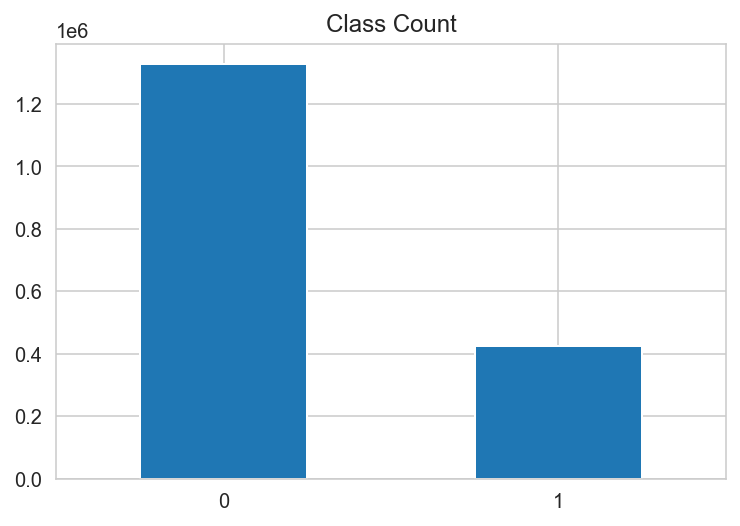

In [90]:
target_count.plot(kind='bar', title='Class Count', rot=0);

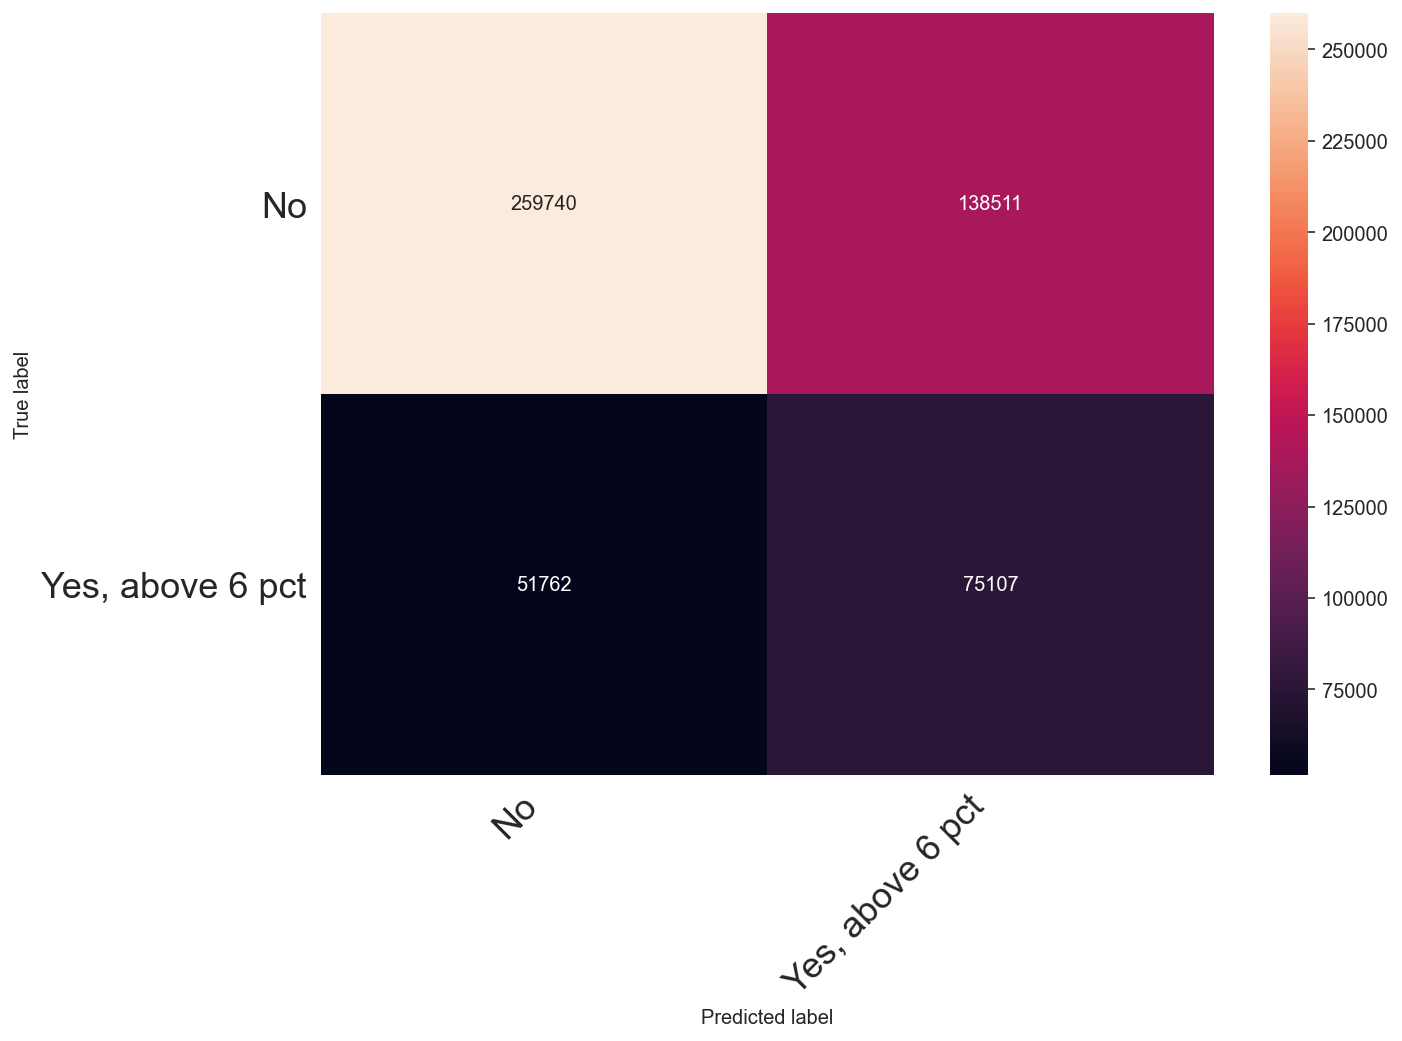

In [172]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

cm = print_confusion_matrix(confusion_matrix(ytest, clf_rus.predict(xtest)), ['No', 'Yes, above 6 pct'])

### Initially, messed with XGBoost Regressor.  But, I should be working with XGBoost Classifier

In [128]:
gbm = xgb.XGBRegressor( 
                       n_estimators=100, #arbitrary large number
                       max_depth=3,
                       objective="reg:linear",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_under, y_under),(xtest,ytest)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_under, y_under, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[11:13:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.49885	validation_1-rmse:0.49873
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:0.49767	validation_1-rmse:0.49761
[2]	validation_0-rmse:0.49673	validation_1-rmse:0.49670
[3]	validation_0-rmse:0.49593	validation_1-rmse:0.49584
[4]	validation_0-rmse:0.49530	validation_1-rmse:0.49526
[5]	validation_0-rmse:0.49449	validation_1-rmse:0.49437
[6]	validation_0-rmse:0.49397	validation_1-rmse:0.49383
[7]	validation_0-rmse:0.49355	validation_1-rmse:0.49342
[8]	validation_0-rmse:0.49291	validation_1-rmse:0.49273
[9]	validation_0-rmse:0.49255	validation_1-rmse:0.49238
[10]	validation_0-rmse:0.49205	validation_1-rmse:0.49182
[11]	validation_0-rmse:0.49180	validation_1-rm

In [131]:
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

# predict using n_estimators with lowest validation error
rmse(gbm.predict(xtest, ntree_limit=gbm.best_ntree_limit),ytest)

0.4850585051270161

In [132]:
rmse(gbm.predict(X_under, ntree_limit=gbm.best_ntree_limit),y_under)

0.4857163745185167

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

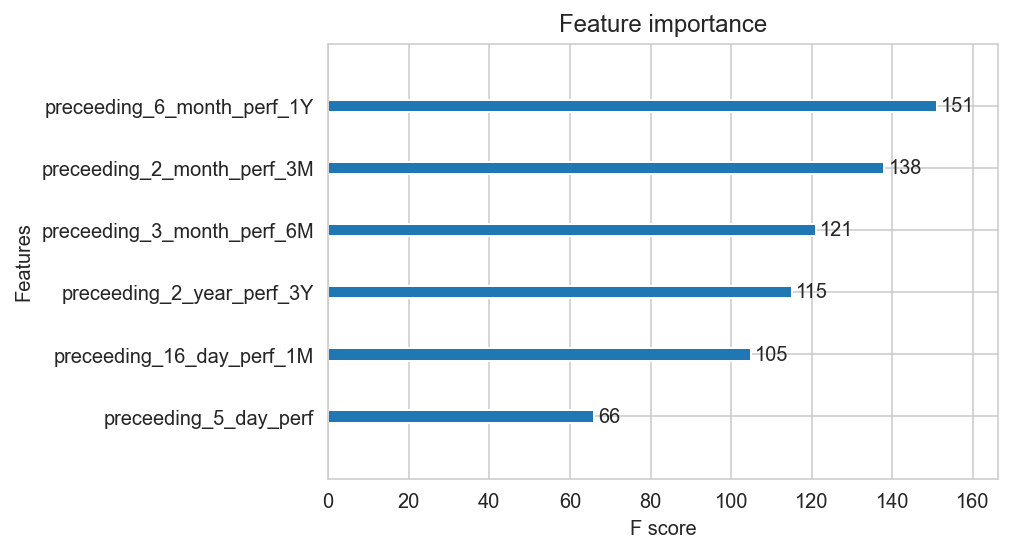

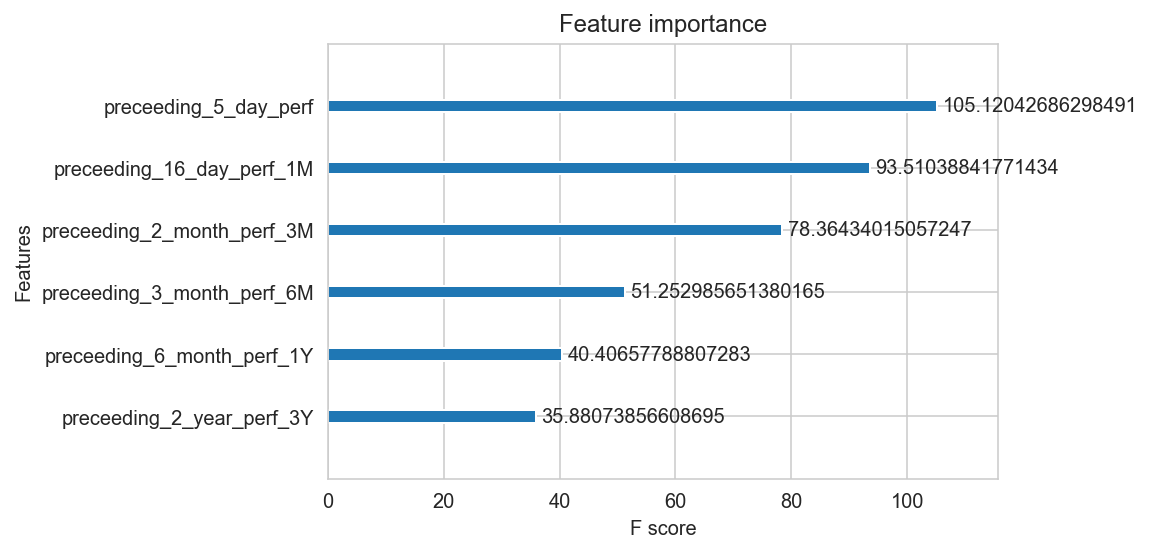

In [133]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')

In [134]:
gbm.get_booster().get_score(importance_type='weight') #extract raw frequency scores

{'preceeding_16_day_perf_1M': 105,
 'preceeding_5_day_perf': 66,
 'preceeding_6_month_perf_1Y': 151,
 'preceeding_2_month_perf_3M': 138,
 'preceeding_3_month_perf_6M': 121,
 'preceeding_2_year_perf_3Y': 115}

In [135]:
gbm.get_booster().get_score(importance_type='gain') #extract raw gain scores

{'preceeding_16_day_perf_1M': 93.51038841771434,
 'preceeding_5_day_perf': 105.12042686298491,
 'preceeding_6_month_perf_1Y': 40.40657788807283,
 'preceeding_2_month_perf_3M': 78.36434015057247,
 'preceeding_3_month_perf_6M': 51.252985651380165,
 'preceeding_2_year_perf_3Y': 35.88073856608695}

### XGBoost Classifier

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [156]:
# print class balance
print(f'Was not over a 6% one month gain: {target_count[0]:,}')
print(f'Over 6% one month gain: {target_count[1]:,}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print(f'Percentage of Majority Class: {(round(target_count[0] / sum(target_count), 4)*100)}%')

Was not over a 6% one month gain: 1,326,640
Over 6% one month gain: 423,757
Proportion: 3.13 : 1
Percentage of Majority Class: 75.79%


In [161]:
gbm = xgb.XGBClassifier( 
                        n_estimators=5000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))

0.7628142138939671

In [163]:
accuracy_score(y_val, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit))

0.7623200411334552

In [167]:
accuracy_score(y, gbm.predict(X, ntree_limit=gbm.best_ntree_limit))

0.7627452515058013

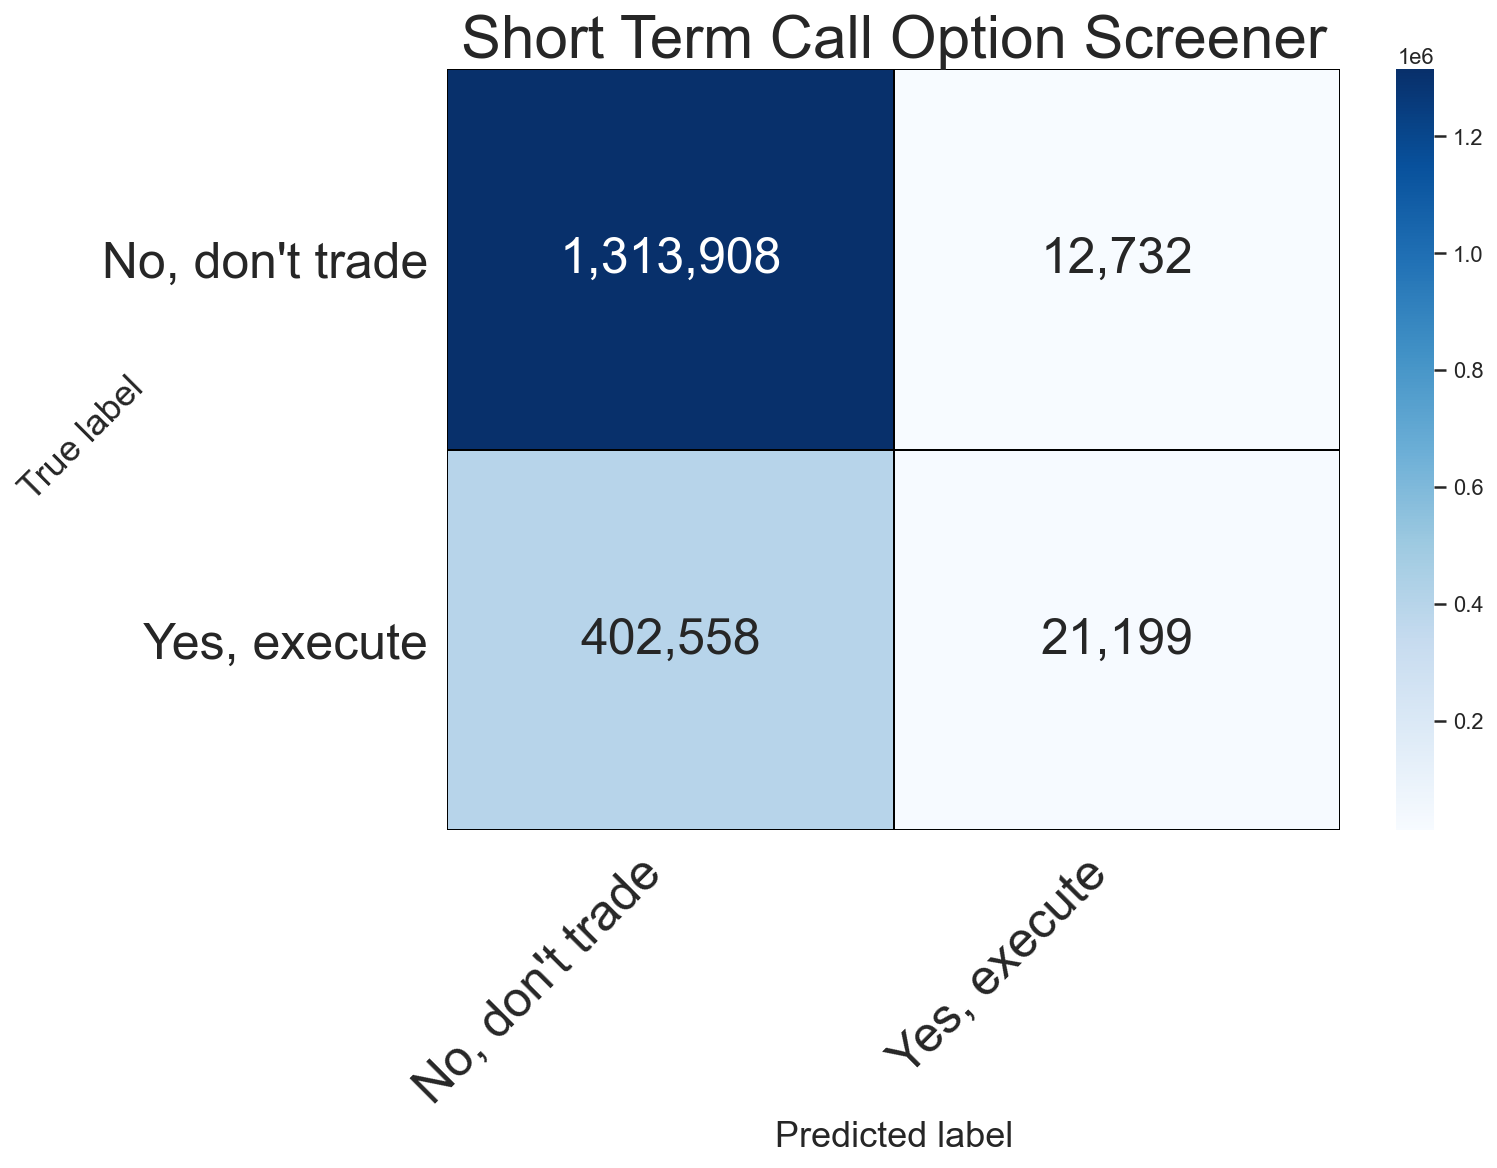

In [364]:
cm = print_confusion_matrix(confusion_matrix(y, gbm.predict(X)), 
                            ["No, don't trade", 'Yes, execute'], 
                            "Short Term Call Option Screener")

plt.savefig("CM_Option_Screener.png",bbox_inches='tight')

In [197]:
df['final_model_prediction']=gbm.predict(X)

df

,Date,High,Low,adj_close,Ticker,daily_performance,twenty_one_day_performance,one_month_6_pct_gain,preceeding_5_day_perf,preceeding_16_day_perf_1M,preceeding_2_month_perf_3M,preceeding_3_month_perf_6M,preceeding_6_month_perf_1Y,preceeding_2_year_perf_3Y,preceeding_2_year_perf_5Y,preceeding_5_year_perf_10Y,one_month_neg6_pct_loss,final_model_prediction
1508,2006-01-03,17.490000,17.180000,13.155495,CSCO,0.019275,-0.013567,0,0.014335,-0.002288,-0.009632,-0.090206,0.010417,0.274901,-0.714164,0.000000,0,0
1509,2006-01-04,17.930000,17.459999,13.457051,CSCO,0.022922,0.011904,0,0.005128,-0.004538,-0.005079,-0.085655,-0.002574,0.338155,-0.716683,0.000000,0,0
1510,2006-01-05,18.480000,17.930000,13.834007,CSCO,0.028012,0.048572,0,0.001144,-0.001713,-0.037912,-0.062339,-0.020686,0.373527,-0.717059,0.000000,0,0
1511,2006-01-06,18.879999,18.469999,14.150637,CSCO,0.022888,0.068906,1,0.002855,-0.020146,-0.028804,-0.052035,-0.016218,0.398299,-0.727013,0.000000,0,0
1512,2006-01-09,19.110001,18.920000,14.369271,CSCO,0.015451,0.071991,1,0.013683,-0.017367,-0.028308,-0.056497,-0.016666,0.396332,-0.703812,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354174,2020-10-09,29.340000,28.750000,28.940001,PPL,-0.005840,0.060850,1,-0.027843,0.001759,0.078528,0.003448,-0.111752,-0.132891,0.463961,0.481439,0,0
2354175,2020-10-12,29.160000,28.900000,28.990000,PPL,0.001728,0.053033,0,-0.011996,-0.019757,0.086629,-0.018438,-0.089252,-0.135347,0.468832,0.492469,0,0
2354176,2020-10-13,28.900000,28.180000,28.469999,PPL,-0.017937,0.019699,0,0.001646,-0.028503,0.086973,0.147832,-0.214139,-0.118527,0.433521,0.498393,0,0
2354177,2020-10-14,28.719999,28.230000,28.480000,PPL,0.000351,0.027417,0,-0.003415,-0.028227,0.068801,0.078398,-0.158179,-0.105669,0.415759,0.500842,0,0


In [226]:
def label_cm (row):
    if row['one_month_6_pct_gain'] + row['final_model_prediction'] == 0:
        return 'True Negative'
    if row['one_month_6_pct_gain'] == 1:
        if row['final_model_prediction'] == 0:
            return 'False Negative'
        if row['final_model_prediction'] == 1:
            return 'True Positive'
    else:
        return 'False Positive'

In [227]:
df.apply(lambda row: label_cm(row), axis=1)

1508        True Negative
1509        True Negative
1510        True Negative
1511       False Negative
1512       False Negative
                ...      
2354174    False Negative
2354175     True Negative
2354176     True Negative
2354177     True Negative
2354178     True Negative
Length: 1750397, dtype: object

In [228]:
df['final_outcome'] = df.apply(lambda row: label_cm(row), axis=1)

In [233]:
outcomes = ["True Positive", "False Positive"]

df_outcomes = df[df.final_outcome.isin(outcomes)]
df_outcomes.shape

(33931, 19)

In [234]:
df_outcomes

,Date,High,Low,adj_close,Ticker,daily_performance,twenty_one_day_performance,one_month_6_pct_gain,preceeding_5_day_perf,preceeding_16_day_perf_1M,preceeding_2_month_perf_3M,preceeding_3_month_perf_6M,preceeding_6_month_perf_1Y,preceeding_2_year_perf_3Y,preceeding_2_year_perf_5Y,preceeding_5_year_perf_10Y,one_month_neg6_pct_loss,final_model_prediction,final_outcome
2055,2008-03-07,24.700001,23.780001,18.176447,CSCO,0.007101,0.044627,0,-0.052545,-0.067738,-0.210097,0.114180,0.088343,0.557077,0.327273,0.000000,0,1,False Positive
2056,2008-03-10,24.490000,23.990000,18.085981,CSCO,-0.004977,0.026091,0,-0.045714,-0.036571,-0.253814,0.075758,0.127804,0.569274,0.356060,0.000000,0,1,False Positive
2250,2008-12-12,17.190001,16.510000,12.808702,CSCO,0.004731,0.026586,0,-0.048303,-0.062028,-0.248480,-0.069057,-0.120769,0.757434,-0.232662,0.000000,0,1,False Positive
2254,2008-12-18,16.910000,16.440001,12.559918,CSCO,-0.010689,0.012766,0,-0.042492,-0.093882,-0.217499,-0.044935,-0.137954,0.709059,-0.219048,0.000000,0,1,False Positive
2255,2008-12-19,16.950001,16.600000,12.544840,CSCO,-0.001201,0.103448,1,-0.088822,-0.073348,-0.262897,-0.052776,-0.119146,0.671848,-0.200644,0.000000,0,1,True Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354058,2020-04-27,25.860001,25.500000,24.833538,PPL,0.002354,0.035671,0,0.142659,-0.341813,-0.066816,0.157407,-0.010287,-0.047502,0.333756,0.479206,0,1,False Positive
2354059,2020-04-28,26.629999,25.799999,25.202883,PPL,0.014873,0.020063,0,0.292323,-0.356808,-0.127779,0.134094,0.031425,-0.068600,0.335969,0.493991,0,1,False Positive
2354060,2020-04-29,26.590000,25.730000,25.475031,PPL,0.010798,0.014712,0,0.389457,-0.372272,-0.155124,0.137722,0.022990,-0.067653,0.335690,0.525807,0,1,False Positive
2354061,2020-04-30,26.000000,25.080000,24.707184,PPL,-0.030141,0.029984,0,0.161959,-0.323374,-0.108214,0.146517,0.022651,-0.064136,0.310273,0.554760,0,1,False Positive


In [249]:
table = pd.pivot_table(df_outcomes, 
                       values='final_outcome', 
                       index=['Ticker'],
                       aggfunc='count')

In [261]:
table

,final_outcome
Ticker,
A,68
AAL,541
AAP,21
AAPL,38
ABBV,1
...,...
XYL,4
YUM,9
ZBH,59


In [262]:
table.mean()

final_outcome    74.573626
dtype: float64

In [263]:
table.max()

final_outcome    589
dtype: int64

In [275]:
table1 = table.sort_values(by=['final_outcome'], ascending=False)
table1

,final_outcome
Ticker,
AMD,589
AAL,541
UAL,399
FCX,336
RF,336
...,...
WEC,1
ABBV,1
ABC,1


In [257]:
table2 = df_outcomes.groupby(['Ticker', 'final_outcome'])['final_model_prediction'].agg('size').unstack(fill_value=0)
table2

final_outcome,False Positive,True Positive
Ticker,,
A,27,41
AAL,222,319
AAP,6,15
AAPL,20,18
ABBV,0,1
...,...,...
XYL,0,4
YUM,0,9
ZBH,17,42


In [290]:
table3 = table2.sort_values(by='False Positive', ascending=False)
table3[0:9]

final_outcome,False Positive,True Positive
Ticker,,
AMD,275,314
AAL,222,319
UAL,182,217
C,168,165
MU,137,143
HIG,135,178
UA,133,60
RF,129,207
KEY,128,118


In [283]:
table4 = table2.sort_values(by='True Positive', ascending=False)
table4[0:9]

final_outcome,False Positive,True Positive
Ticker,,
AAL,222,319
AMD,275,314
MNST,79,221
MGM,98,220
FCX,118,218
UAL,182,217
LVS,82,212
URI,101,210
RF,129,207


In [302]:
table1[0:5]

,final_outcome
Ticker,
AMD,589
AAL,541
UAL,399
FCX,336
RF,336


In [300]:
table5 = table3[0:3].append(table4[4:5]).append(table4[8:9])
table5

final_outcome,False Positive,True Positive
Ticker,,
AMD,275,314
AAL,222,319
UAL,182,217
FCX,118,218
RF,129,207


In [347]:
table6 = table5[['True Positive', 'False Positive']]
table6

final_outcome,True Positive,False Positive
Ticker,,
AMD,314,275
AAL,319,222
UAL,217,182
FCX,218,118
RF,207,129


## Fun Facts

In [ ]:
#max amount of predictions for any particular ticker is 589 (AMD)

In [ ]:
#455 stocks had an "execute" recommendation at some point

In [ ]:
#20 years of data was scraped - 2,354,179 lines (Yahoo Finance)

In [ ]:
#15 years of data was used - 1,750,397 lines

In [ ]:
#6 features were used for various momentum performance attributes over the prior 3 year period

In [ ]:
#Only 2014 and 2017 suggested more "False Positives" than "True Positives".
#For the other 13 years, "True Positives" outweighed "False Positives"

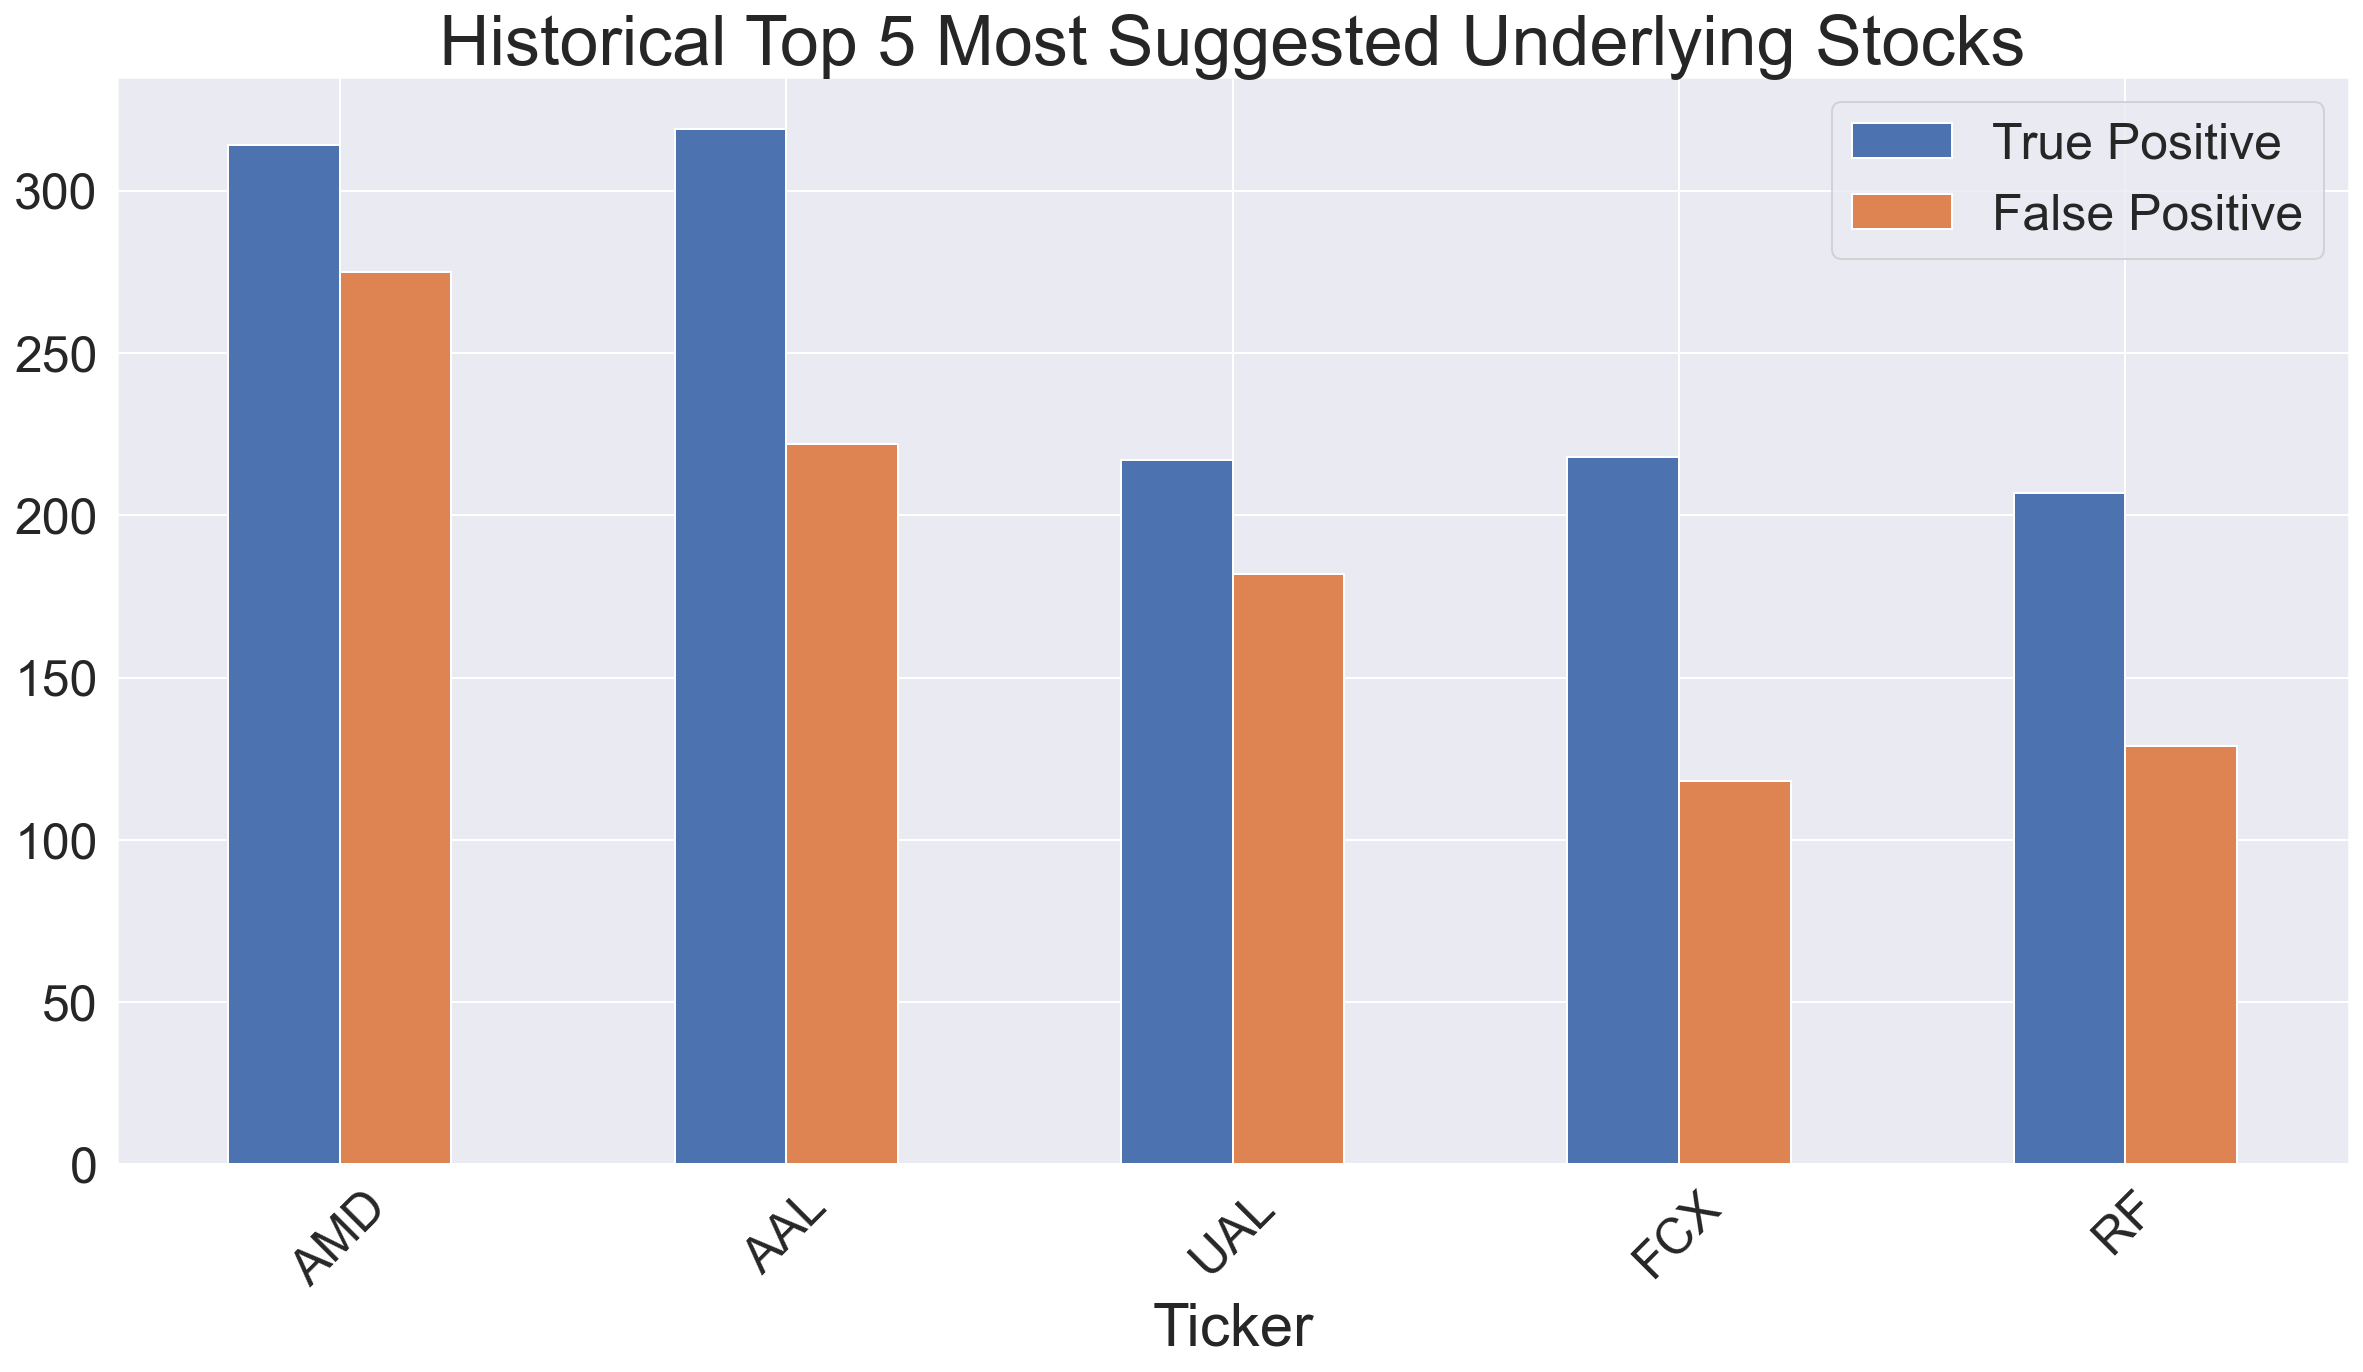

In [366]:
sns.set()
table6.plot(kind='bar', figsize=(20,10))
plt.title("Historical Top 5 Most Suggested Underlying Stocks", fontsize=35) 
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Ticker', fontsize=30)
plt.legend(loc=1, prop={'size': 25})
plt.savefig("Historical_Top_5_Most_Suggested_Underlying_Stocks.png",bbox_inches='tight')

In [349]:
table_ = pd.pivot_table(df_outcomes, 
                       values='final_outcome', 
                       index=(df_outcomes['Date'].dt.year),
                       aggfunc='count')

table_

,final_outcome
Date,
2006,696
2007,556
2008,6278
2009,12945
2010,2227
2011,849
2012,631
2013,191
2014,104


In [357]:
table_2 = df_outcomes.groupby([(df_outcomes['Date'].dt.year), 'final_outcome'])['final_model_prediction'].agg('size').unstack(fill_value=0)

table_5 = table_2[['True Positive', 'False Positive']]
table_5

final_outcome,True Positive,False Positive
Date,,
2006,464,232
2007,310,246
2008,3053,3225
2009,8276,4669
2010,1499,728
2011,546,303
2012,412,219
2013,128,63
2014,36,68


In [354]:
table_3 = table_2[0:6].append(table_2[11:16])
table_3

final_outcome,False Positive,True Positive
Date,,
2006,232,464
2007,246,310
2008,3225,3053
2009,4669,8276
2010,728,1499
2011,303,546
2017,114,58
2018,113,116
2019,174,489


In [355]:
table_4 = table_3[['True Positive', 'False Positive']]
table_4

final_outcome,True Positive,False Positive
Date,,
2006,464,232
2007,310,246
2008,3053,3225
2009,8276,4669
2010,1499,728
2011,546,303
2017,58,114
2018,116,113
2019,489,174


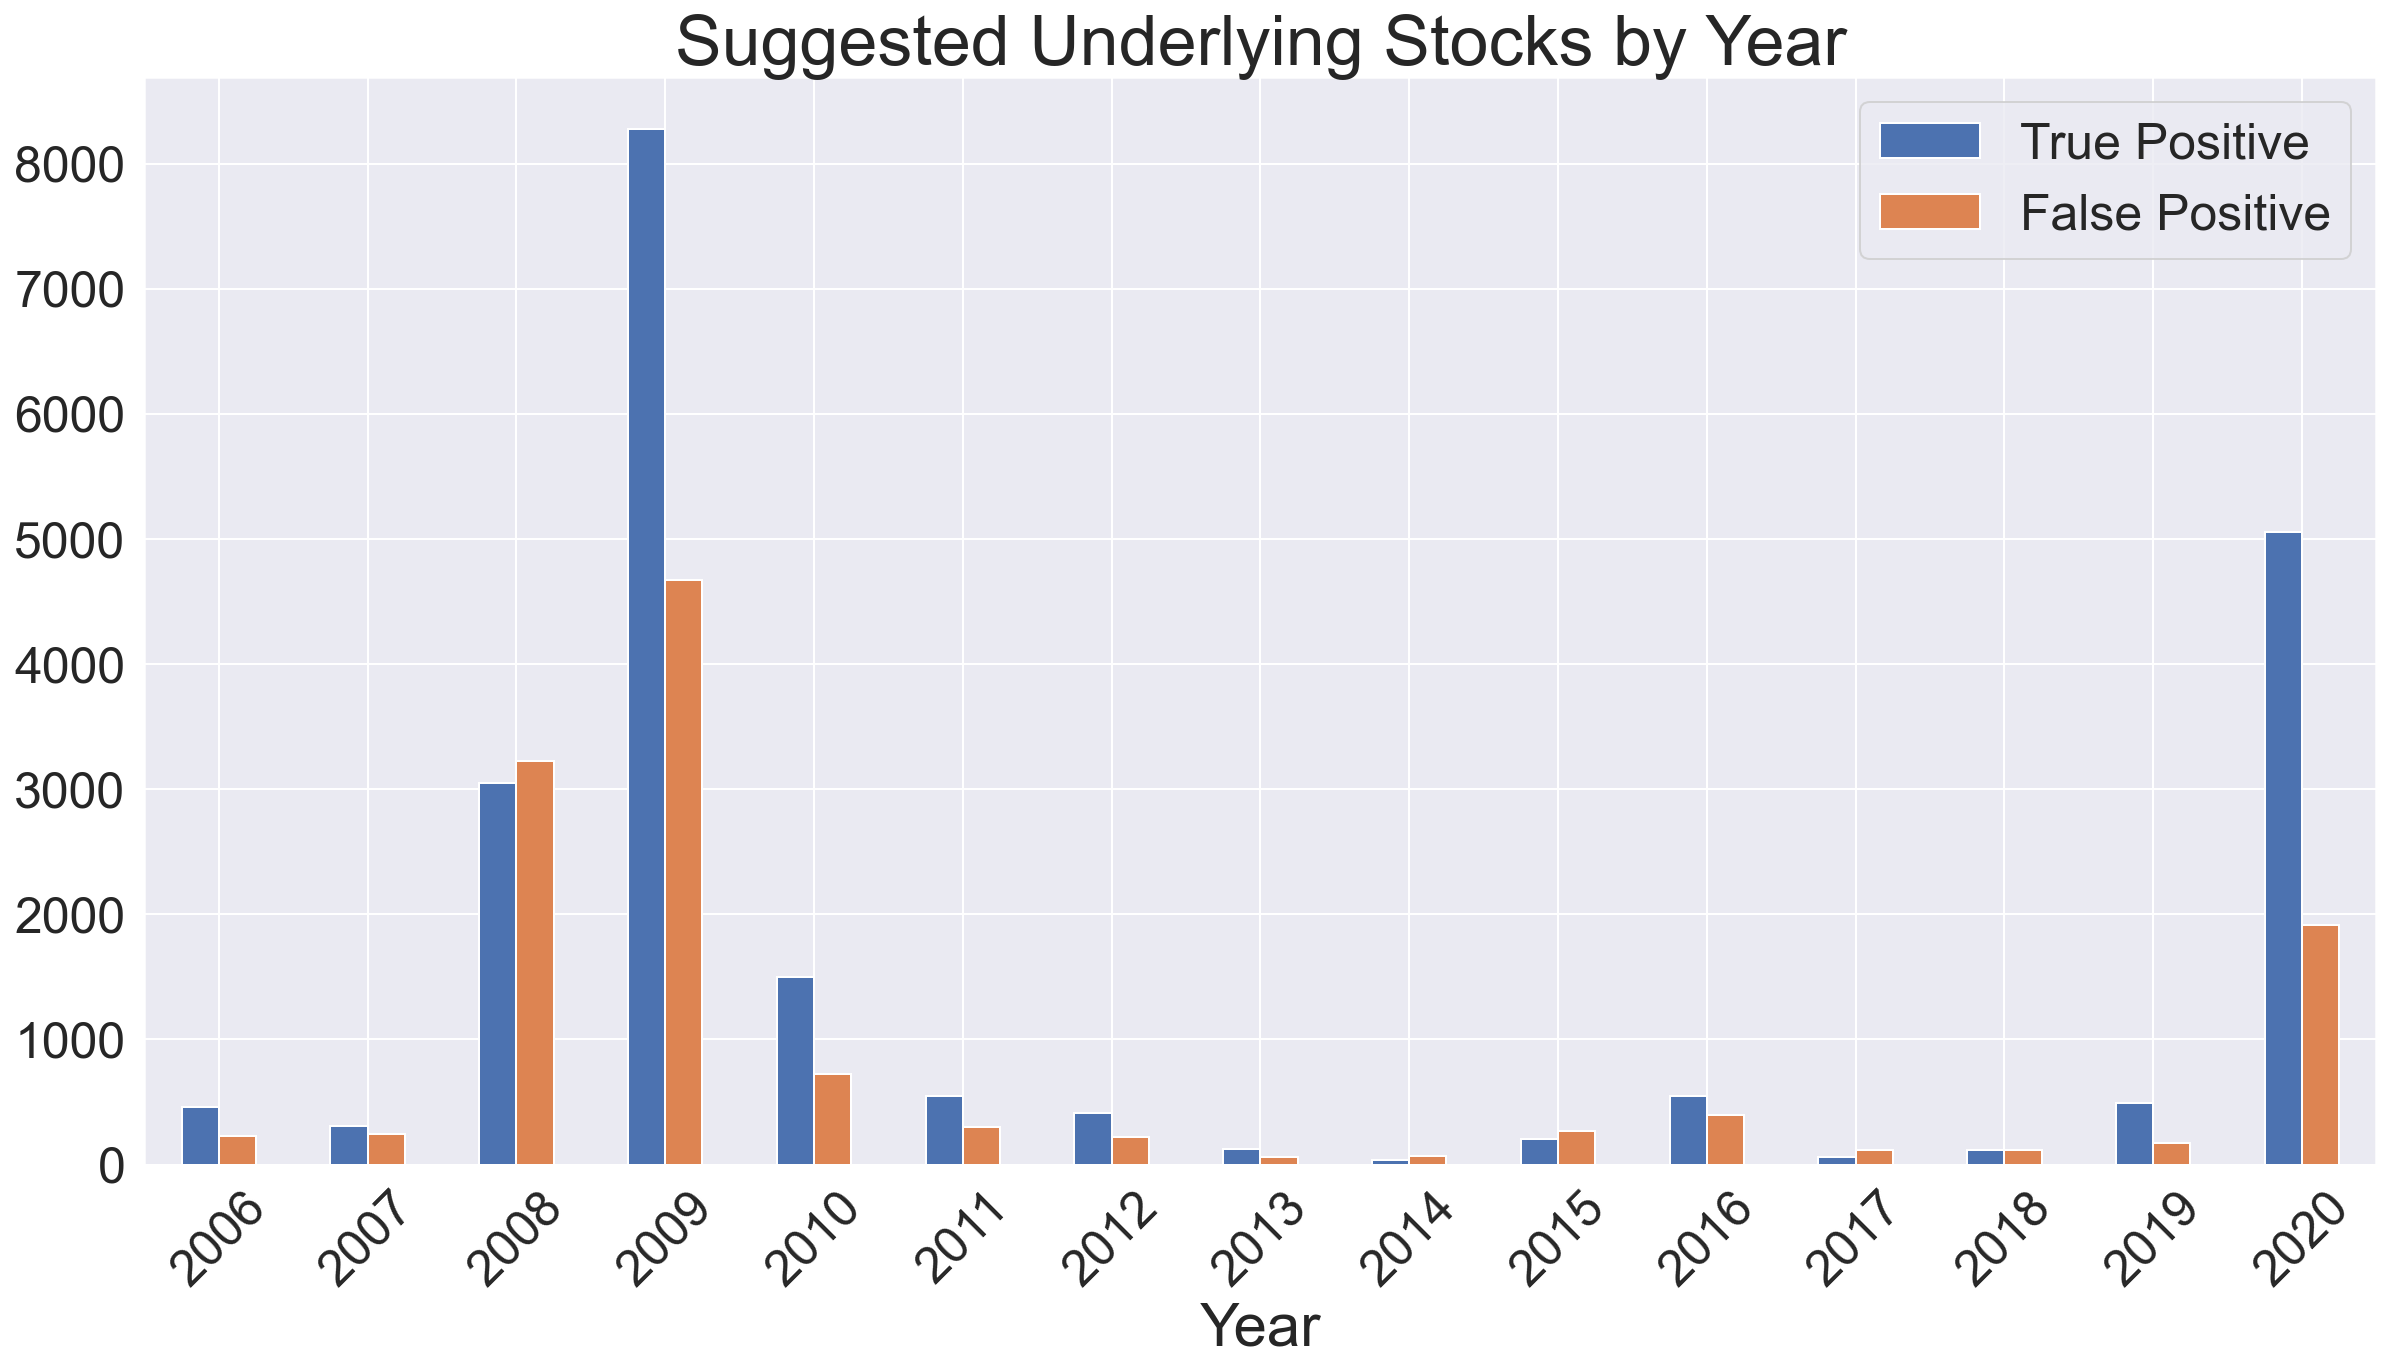

In [365]:
sns.set()
table_5.plot(kind='bar', figsize=(20,10))
plt.title("Suggested Underlying Stocks by Year", fontsize=35) 
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Year', fontsize=30)
plt.legend(loc=1, prop={'size': 25})
plt.savefig("Suggested_Underlying_Stocks_by_Year.png",bbox_inches='tight')

In [362]:
import pickle as pkl

pkl.dump(gbm, open("call_option_screener.pickle.dat", "wb"))